# **Exercises: Learning from Data:**
Here I will write my solutions to the exercises 1.2, 1.3, 1.10, 1.11 and 1.12 from the book Learning of Data by Yaser S. Abu-Mostafa, Malik Magdon-Ismail, Hsuan-Tien Lin.

**Exercise 1.2:**
Suppose that we use a perceptron to detect spam messages. Let's say
that each email message is represented by the frequency of occurrence of
keywords, and the output is if the message is considered spam.



1.   Can you think of some keywords that will end up with a large positive
weight in the perceptron?
2.   How about keywords that will get a negative weight?

3. What parameter in the perceptron directly affects how many borderline messages end up being classified as spam?

**Solution:**

We will consider the positive weight for words which aren't probably spam, and the negative weight for words which are probably spam.
1. Large positive weight: Person name, Hi, Good morning, appoinment.
2. Free, congratulations, discount.
3. The parameter b wich give us the threshold directly affects how many borderline messages end up being classified as spam. In our context for example a high value of b will end up with many messages considered as spam, and a low value will give us few messages classified as spam.

**Exercise 1.3:**
The weight update rule in (1.3) has the nice interpretation that it moves
in the direction of classifying x(t) correctly.


1.   Show that $y(t)w(t)^Tx(t) < 0$. [Hint: $x(t)$ is misclassified by $w(t)$.]
2.   Show that $y(t)w^T(t+l)x(t) > y(t)w^T(t)x(t)$. [Hint: Use (1.3).]
3. As far as classifying $x(t)$ is concerned, argue that the move from $w(t)$
to $w(t + 1)$ is a move "in the right direction". 

**Solution:**
1. As $x(t)$ es misclassified by $w(t)$ we have that $sign(w(t)^Tx(t))\neq y(t)$ por lo tanto $sign(w(t)^Tx(t))=-y(t)$ y concluimos que $y(t)w(t)^Tx(t)=y(t)(-y(t))=-(y(t))^2 < 0$.

2. Como $w(t+1)=w(t)+y(t)x(t)$ tenemos que: 
$y(t)w^T(t+l)x(t)=y(t)(w(t)+y(t)x(t))^Tx(t)=y(t)(w^T(t)+y(t)x^T(t))x(t)$
$y(t)w^T(t)x(t)+y^2(t)x^T(t)x(t)$. 
Como $(y(t))^2>0$ y $x^T(t)x(t)\geq 0$ concluimos que $y(t)w^T(t+l)x(t) > y(t)w^T(t)x(t)$.

3. From the previous point we observe that $y(t)w^T(t+l)x(t) > y(t)w^T(t)x(t)$ then if $y(t)>0$ and $0>w^T(t)x(t)$ we have that $w^T(t+l)x(t) > w^T(t)x(t)$ then we are approaching to the possitive numbers to get the right classification. On the other side if $y(t)<0$ and $0<w^T(t)x(t)$ then we get $w^T(t+l)x(t)<w^T(t)x(t)$ so we are approaching to the negative numbers to get the right classification. In each case we are moving in the correct direction to clasify $x(t)$.

**Exercise 1.10:**
Here is an experiment that illustrates the difference between a single bin
and multiple bins. Run a computer simulation for flipping 1000 fair coins.
Flip each coin independently times. Let's focus on 3 coins as follows:
$c_1$ is the first coin flipped; $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let $v_1$ , $v_{rand}$ and $v_{min}$ be the fraction of heads you obtain for the respective three coins.

(a) What is $\mu$ for the three coins selected?

(b) Repeat this entire experiment a large number of times (e.g. , 100.000
runs of the entire experiment) to get several instances of $v_1$ , $v_{rand}$
and $v_{min}$ and plot the histograms of the distributions of $v_1$ , $v_{rand}$ and $v_{min}$ · Notice that which coins end up being Crand and Cmin may differ
from one run to another.

(c) Using (b), plot estimates for $\mathbb{P}[|v-\mu| > \epsilon]$ as a function of $\epsilon$, together with the Hoeffding bound $2e^{-2\epsilon^2N}$ (on the same graph).

(d) Which coins obey the Hoeffding bound, and which ones do not? Explain why.

(e) Relate part (d) to the multiple bins in Figure 1. 10. 

**Solution:**
(a) As the three selected coins are fair we can conclude that $\mu=0,5$.

(b)We will us the next code to run the simulation, which can be found in Ref[1]:

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

In [7]:
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status
    """
    
    hts = np.zeros(total_coins) #head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def run_once(total_coins, total_flips, print_freq = False):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins) # store the sum of heads in total_flips
    
    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)
    
    hts_freq = hts_sum/total_flips
    
    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    if print_freq:
        print('Frequency of heads in thefirst coin: {}'.format(v1))
        print('Frequency of heads in a random coin: id({})-freq({})'.format(crand, vrand))
        print('Frequency of heads inthe coin with minimum frequency: id({})-freq({})'.format(cmin, vmin))
    return v1,vrand,vmin

In [8]:
run_once(1000,10)

(0.3, 0.3, 0.0)

However we can see that te values of $v$ can be really different.
(b)We execute the next code:

(array([6.2190e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.7805e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <BarContainer object of 10 artists>)

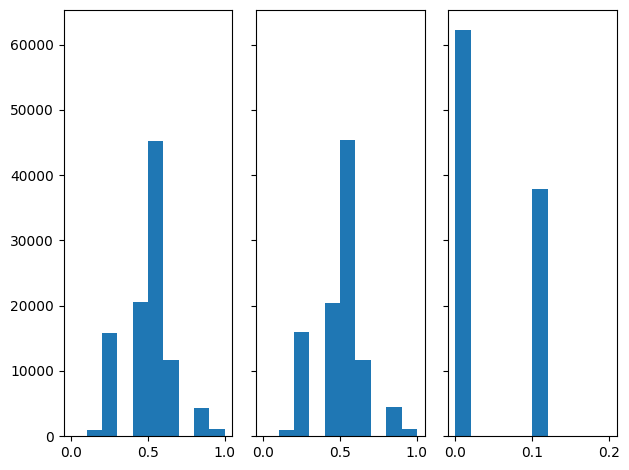

In [10]:
total_runs = 100000
v1s, vrands, vmins = [],[],[]
for run in range(total_runs):
    v1,vrand,vmin = run_once(1000, 10)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
axs[0].hist(v1s,bins=n_bins)
axs[1].hist(vrands,bins=n_bins)
axs[2].hist(vmins,bins=n_bins)

We can watch that fater running the experiment 100.000 times, for $C_1$ and $C_{rand}$ the values of $v$ are centered around 0,5, but for $c_{min}$ this are concentrated in 0.

(c). For the next point we use the next code:

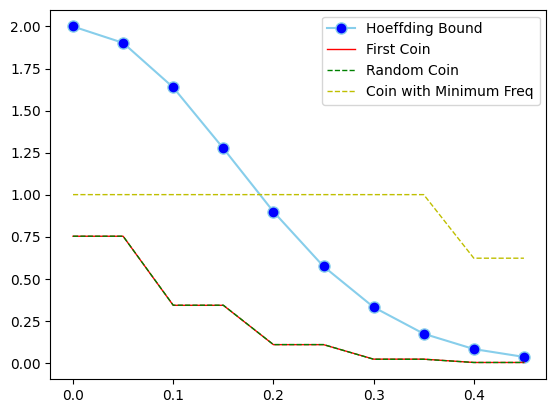

In [15]:
eps = np.arange(0.0,0.5,0.05) #we will consider epislon between 0 an 0,5 with a step of 0,05
bounds = 2.0*np.exp(-2.0*10*eps**2) #we map the Hoeffding bound for each c, that's why N=10 each coin was fliped 10 times en each iteration of the experiment.
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins) #We save our v's
v1d = np.abs(v1s-0.5)   #We compute v -\mu in each case and take abs
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps)) #here we will save the probabilty in each case

for idx in range(eps.shape[0]):
    ep = eps[idx]
    p1[idx] = np.sum(v1d > ep)/total_runs   #To compute the probability we take the number of cases were |v-mu|>ep over the total number
    prand[idx] = np.sum(vrandd > ep)/total_runs
    pmin[idx] = np.sum(vmind > ep)/total_runs

#plt.ylim((0,0.01))    
plt.plot(eps, bounds, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding Bound')
plt.plot(eps, p1, marker='', color='r', linewidth=1, label='First Coin')
plt.plot(eps, prand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')
plt.legend()

(d). The first coin and the random coin obey the Hoeffding bound, because they satisfy the conditions, that is: They were selected before the data was created in each itaration or are independent of the data results, however $c_{min}$ doesn\'t obey the bound, and we can explain that because $c_{min}$ was selected after the data was generated and was selected observing and using that data, that contradicts the condition in the bound which said that it muast have been selected before.
 (e). If we see each coin as an possible explanition for the probability of a fair coin, we have 1000 possible hypothesis, they will be like our 1000 bins, however when we select the coin with the minimun number of heads after 10 flips, it is like selecting an especific bin after samplig the data, after taken out some balls, on the other hand selecting always the first coin or a random coin before flipping them, it is like selecting the bin before samplig. 

**Exercise 1.11**
We are given a data set $\mathcal{D}$ of 25 training examples from an unknown target
function $f: \mathbb{R}\longrightarrow \{-1,+1\}$. To learn f, we use
a simple hypothesis set $\mathcal{H}= \{h_1, h_2\}$ where $h_1$ is the constant function +1 and $h_2$ is the constant -1.

We consider two learning algorithms, S (smart) and (crazy). S chooses
the hypothesis that agrees the most with and chooses the other hypothesis del iberately. Let us see how these a lgorithms perform out of sample from the deterministic and probabilistic points of view. Assume in
the probabilistic view that there is a probability distribution on X, and let
$\mathbb{P}[f(x) = +1] = p$.

(a) Can S produce a hypothesis that is guaranteed to perform better than
random on a ny point outside $\mathcal{D}$?

(b) Assume for the rest of the exercise that all the examples in have
$y_n = 1$. Is it possible that the hypothesis that produces turns out
to be better than the hypothesis that S produces?

( c) If $p = 0.9$, what is the probability that S will produce a better hypothesis than C?
( d) Is there any value of $p$ for which it is more likely than not that C will
produce a better hypothesis than S?

**Solution:**
(a) We cann\'t guaranteed that, it depends in the data we have and the data we don't know anything about yet. For example let's suppose that $f(x)=+1$ for all $x\in\mathcal{D}$ and $f(x)=-1$ for all $x\notin \mathcal{D}$ then S will chose $h_1$ and in reality all other random hpothesis will perform better than $h_1$ outside $\mathcal{D}$.

(b). Yes, it is possible. Under our asumptions we know for sure that $S$ will select $h_1$ and C, $h_2$. If we consider that the data behave in the form we described before then the hypothesis C produces, $h_2$ will be accurate in all the points except those 25 which is almost perfect, on the other hand $h_1$ will be wrong almost all the time. That is, the hypothesis of C is better.

(c) As $p=0.9$ and for all the points $X\in\mathcal{D}$ we have that $f(x)=+1$ we know that S will select $h_1$ and C,$h_2$. Like $h_1$ will be right in the 90% of the cases we can conclude that it is the best hypothesis and that in this case S will sure chose a better hypothesis than C.

(d). Following the ideas we have developed we observe that for all values of $p<0,5$ we know that $h_2$, which is the hypoyhesis selected by C, will behaves better than $h_1$. So, yes there are values of $p$ for which that happens.

**Solution:**
A friend comes to you with a learning problem. She says the target function is completely unknown, but she has 4,000 data points. She is willing to pay you to solve her problem and produce for her a g which approximates f. What is the best that you can promise her among the
following:

(a) After learning you will provide her with a g that you will guarantee approximates well out of sample.

(b) After learning you will provide her with a g, and with high probability
the g which you produce will approximate well out of sample.

(c) One of two things wi ll happen.

  (i) You will produce a hypothesis g;

  (ii) You will declare that you failed.

  If you do return a hypothesis g, then with high probability the g which
you produce will approximate well out of sample. 

**Solution:**
The best promise we can do is (c): After all if the unknown target function $f$ is too complex, maybe we cann't learn at all and will not be able to make $E_{in}(g)$ small without observing the data many times.

But if we can find a $g$ which makes $E_{in}(g)$ small by the Hoeffding inequality, as we have 4.000 points we can assure that the probability that $g$ matches $f$ is high and that the errors, that $g$ could produce will be small.